# 울릉도의 기상환경 분석

#### 평균 풍속에 대한 최대값 구하기

In [5]:
import csv  # csv 패키지 import
import pandas as pd  # pandas 패키지 import
import matplotlib.pyplot as plt # 시각화 패키지

filePath = 'C:/filetest/pandas/weather.csv'

# print('1. 평균 풍속에 대한 최대 값을 구할 경우')
# 평균 풍속에 대한 최대 값을 구할 경우
f = open(filePath)
data = csv.reader(f)
header = next(data)

max_wind = 0.0

for row in data:
    if row[3] == '':  # 평균 풍속 데이터가 없을 경우
        wind = 0  # 0으로 처리
    else:
        wind = float(row[3])  # 평균 풍속 데이터가 있을 경우, 실수로 변환

    if max_wind < wind:  # 기존 최대 평균 풍속값과 새로운 평균 풍속값 비교
        max_wind = wind  # 현재까지의 최대 평균 풍속보다 크면 새로운 값을 저장

print('최대 풍속은 :', max_wind, 'm/s')
print()

최대 풍속은 : 14.9 m/s



>#### 울릉도는 몇 월에 바람이 가강 강한지 확인(월별 평균풍속 계산해서 Max값)

작업 내용  
-. 울릉도 데이터 파일 읽기  
-. 헤더 부분은 제외하고 데이터 처리  
-. 매달 풍속 저장 리스트 선언  
-. 각 달마다 측정된 일 수 저장 리스트 선언  

- 반복해서 해야 할 일들 첫 번째  
    1. 첫 번째열에서 달 정보 추출  
    2. 풍속 데이터 존재 여부 확인   
    3. 풍속 데이터 추출  
    4. 해당 달의 풍속 데이터 추가  
    5. 해당 달의 일수를 증가  

- 반복해서 해야 할 일들 두 번째  
    6. 일수로 나누어 월 평균 구하기  


- 열     : 일시,  평균기온(°C),  최대 풍속(m/s),  평균 풍속(m/s)  
- 레코드 : 2010-08-01 ~~ 2020-07-31  


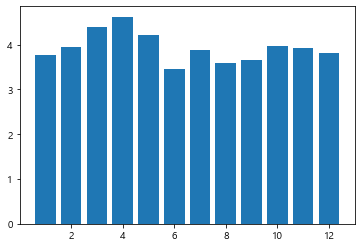

In [6]:
# 1. 울릉도 데이터 파일 읽기

filePath = 'C:/filetest/pandas/weather.csv'
f = open(filePath)
data = csv.reader(f)

# 2. 헤더 부분은 제외하고 데이터 처리
header = next(data)

# 3. 매달 풍속 저장 리스트 선언
# 매달 풍속 저장 리스트 선언
monthly_wind = [0 for x in range(12)]   # 리스트 컴프리헨션으로 리스트 초기화(요소 12개)
month12 = [x for x in range(1, 13)]   # 리스트 컴프리헨션으로 리스트 초기화(요소 12개)

# 4. 각 달마다 측정된 일 수 저장 리스트 선언
days_counted = [0 for x in range(12)]

# 반복해서 해야 할 일들 첫 번째
for row in data:
    month = int(row[0][5:7])  # "2010-08-01" => "08" => 8

    if row[3] != '':    # 날짜 컬럼이 데이터가 있으면
        wind = float(row[3])    # 평균풍속
        monthly_wind[month - 1] += wind     # monthly_wind 리스트는 인덱스가 0(1월),1(2월),2,~식이므로
        days_counted[month - 1] += 1        # 하루씩 추가

# 1월~12월까지 월별 평균 풍속 합산과 갯수 모두 계산 완료

# 반복해서 해야 할 일들 두 번째
for i in range(12):
    monthly_wind[i] /= days_counted[i]      # 월별 평균 풍속(월별풍속더한값 / 월별일수 = 월별 평균 풍속)

# 시각화 작업 : matplotlib

plt.bar(month12, monthly_wind)
plt.show()
f.close()